#Coding Assignment 7

###*SVR*
###*Author: Sreehari Sreenath*
Ref: salary-experience-dataset.csv 



In [ ]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import svm


## load file

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/salary-experience-dataset.csv') 

##Understanding the data

In [ ]:
print(dataset.describe())
print(dataset.info())
print(dataset.shape)


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None
(30, 2)


### Performing Feature Scaling 
[Reference for feature scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

In [ ]:

scaler = MaxAbsScaler()
scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset),
                              columns=['YearsExperience','Salary'])

### Visualizing the scaled data 

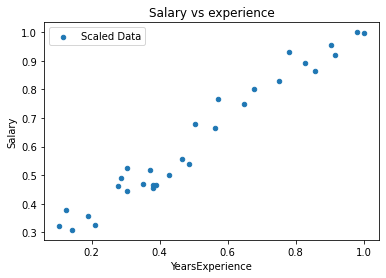

In [ ]:
dataplot = scaled_dataset.plot.scatter(x='YearsExperience', y='Salary', marker='o', 
                                       label = 'Scaled Data', title = 'Salary vs experience' )

### Performing the train test split

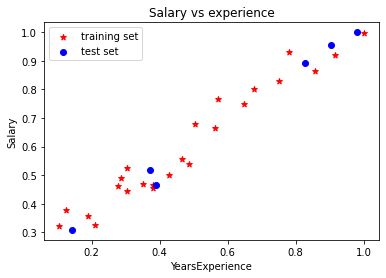

In [ ]:
X = scaled_dataset[['YearsExperience']].values
y = scaled_dataset[['Salary']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Visualizing the test,train data
plt.figure()
plt.scatter( X_train, y_train, color = "red" ,marker = '*', label = "training set")
plt.scatter( X_test, y_test, color = "blue" ,label = "test set")
plt.title("Salary vs experience")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()



## Calculating the required Metrics

### Creating a function to print the metrics

In [ ]:
def PrintMet(kernel, test, predict, Degree):

  #storing the value of the optional degree variable if present
  if Degree != -1:
    # Mean Absolute Error (MAE)
    MAE = mean_absolute_error(test, predict)
    print('MAE for polynomial kernel with {} degree: {:.4f}'.format(Degree,MAE))
    # Mean Squared Error (MSE)
    MSE = mean_squared_error(test, predict, squared = True)
    print('MSE for polynomial kernel with {} degree: {:.4f}\n\n'.format(Degree,MSE))
  else:
    # Mean Absolute Error (MAE)
    MAE = mean_absolute_error(test, predict)
    print('MAE for {} kernel: {:.4f}'.format(kernel,MAE))
    # Mean Squared Error (MSE)
    MSE = mean_squared_error(test, predict, squared = True)
    print('MSE for {} kernel: {:.4f}'.format(kernel,MSE))

In [ ]:
def GenerateMet(kernel, Degree):
  if kernel.lower() == 'linear':
    
    # Creating a SVR with 'linear' kernel
    LK_reg = svm.SVR(kernel='linear') # Linear Kernel
    # Train the model using the training sets
    LK_reg.fit(X_train, y_train.ravel())
    # Predict the response for test dataset
    y_predict_LK = LK_reg.predict(X_test)
    # Printing the metrics
    PrintMet('Linear', y_test, y_predict_LK, -1)

  elif kernel.lower() == 'rbf':
    
    # Creating a SVR with radial basis function kernel
    Rbf_reg = svm.SVR(kernel='rbf') # rbf Kernel
    # Train the model using the training sets
    Rbf_reg.fit(X_train, y_train.ravel())
    # Predict the response for test dataset
    y_predict_rbf = Rbf_reg.predict(X_test)
    # Printing the metrics
    PrintMet('Rbf', y_test, y_predict_rbf, -1)

  elif kernel.lower() == 'poly':
    
    # Creating a SVR with Polynomial kernel where Degree is 
    # provided by the user.
    Poly_reg = svm.SVR(kernel='poly',degree = Degree) # poly Kernel
    # Train the model using the training sets
    Poly_reg.fit(X_train, y_train.ravel())
    # Predict the response for test dataset
    y_predict_poly = Poly_reg.predict(X_test)
    # Printing the metrics
    PrintMet('Polynomial', y_test, y_predict_poly, degree)

  else:
    print("Invalid Kernel\n\n")

### SVR with Linear Kernel

In [ ]:
GenerateMet('Linear',0)

MAE for Linear kernel: 0.0830
MSE for Linear kernel: 0.0075


### SVR with Rbf Kernel

In [ ]:
GenerateMet('Rbf', 0)

MAE for Rbf kernel: 0.0718
MSE for Rbf kernel: 0.0061


### SVR with Polynomial Kernel

In [ ]:
for degree in range(6):
  GenerateMet('poly', degree)

MAE for polynomial kernel with 0 degree: 0.2598
MSE for polynomial kernel with 0 degree: 0.0861


MAE for polynomial kernel with 1 degree: 0.0466
MSE for polynomial kernel with 1 degree: 0.0027


MAE for polynomial kernel with 2 degree: 0.0464
MSE for polynomial kernel with 2 degree: 0.0037


MAE for polynomial kernel with 3 degree: 0.0703
MSE for polynomial kernel with 3 degree: 0.0081


MAE for polynomial kernel with 4 degree: 0.0895
MSE for polynomial kernel with 4 degree: 0.0127


MAE for polynomial kernel with 5 degree: 0.1034
MSE for polynomial kernel with 5 degree: 0.0153




### Performing Linear regression for the data

In [ ]:
# Creating a linear regressor 
Linear_reg = LinearRegression()
# Train the model using the training set
Linear_reg.fit(X_train, y_train.ravel()) 
# Predict the response for test dataset
Linear_reg_predict = Linear_reg.predict(X_test)

# Printing the metrics 
print("MAE for linear regression model is {:.4f}".format(mean_absolute_error(y_test, Linear_reg_predict)))
print("MSE for linear regression model is {:.4f}".format(mean_squared_error(y_test, Linear_reg_predict)))



MAE for linear regression model is 0.0200
MSE for linear regression model is 0.0009
